[Reference](https://medium.com/@evertongomede/comparing-two-populations-in-data-science-9a9379086892)

Descriptive Statistics:
       Population1  Population2
count   100.000000   100.000000
mean     48.961535    55.267655
std       9.081684    11.444028
min      23.802549    31.974745
25%      43.990943    45.332074
50%      48.730437    56.009286
75%      54.059521    61.458045
max      68.522782    87.642030


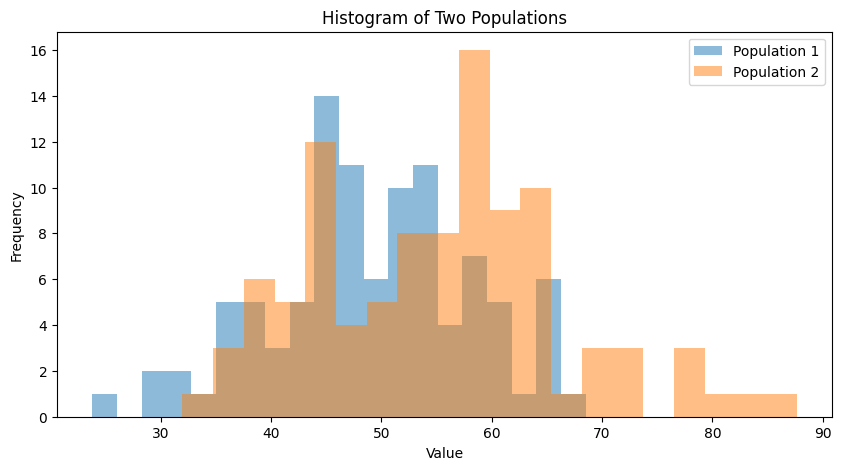

t-statistic: -4.316398519082446
P-value: 2.5039591073845923e-05
There is a significant difference between the populations.
Cohen's d: -0.6135061708964491


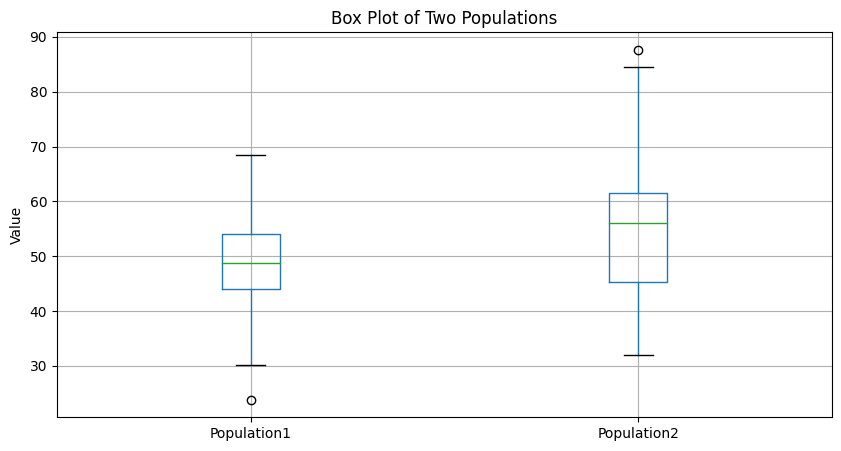

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate two example datasets
np.random.seed(42)
population1 = np.random.normal(loc=50, scale=10, size=100)  # Sample population 1
population2 = np.random.normal(loc=55, scale=12, size=100)  # Sample population 2

# Create a DataFrame
data = pd.DataFrame({'Population1': population1, 'Population2': population2})

# Descriptive Statistics
print("Descriptive Statistics:")
print(data.describe())

# Visualization - Histograms
plt.figure(figsize=(10, 5))
plt.hist(data['Population1'], alpha=0.5, label='Population 1', bins=20)
plt.hist(data['Population2'], alpha=0.5, label='Population 2', bins=20)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Two Populations')
plt.legend()
plt.show()

# Hypothesis Testing (t-test)
from scipy import stats

t_stat, p_value = stats.ttest_ind(data['Population1'], data['Population2'])
print(f"t-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:  # You can choose your significance level
    print("There is a significant difference between the populations.")
else:
    print("There is no significant difference between the populations.")

# Effect Size (Cohen's d)
def cohen_d(pop1, pop2):
    mean1, mean2 = np.mean(pop1), np.mean(pop2)
    std1, std2 = np.std(pop1), np.std(pop2)
    n1, n2 = len(pop1), len(pop2)

    pooled_std = np.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2))
    effect_size = (mean1 - mean2) / pooled_std

    return effect_size

effect_size = cohen_d(data['Population1'], data['Population2'])
print(f"Cohen's d: {effect_size}")

# Visualization - Box Plots
plt.figure(figsize=(10, 5))
data.boxplot(column=['Population1', 'Population2'])
plt.title('Box Plot of Two Populations')
plt.ylabel('Value')
plt.show()